In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
data_set = pd.read_csv('Breast_Cancer.csv')
data_set.head(5) 

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
data_set.shape

(569, 33)

Benign 357
Malignent 212


C:\Users\Nayeem\.conda\envs\tensorflow 3_7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


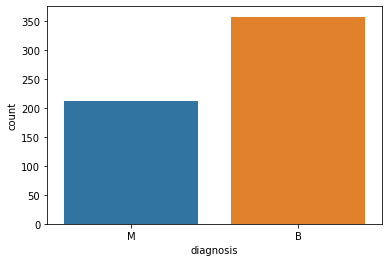

In [4]:
import seaborn as sns
ax = sns.countplot(data_set['diagnosis'], label='Count')
B,M = data_set['diagnosis'].value_counts()

print('Benign', B)
print('Malignent', M)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
del data_set['Unnamed: 32'] # ei column er dorkar nai tai delete kore disi
data_set.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
data_set.shape

(569, 32)

In [8]:
real_x = data_set.iloc[:,2:].values # IV
real_y = data_set.iloc[:, 1].values # DV/op

In [9]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder
LabelEncoder_real_x_1 = LabelEncoder()
real_y = LabelEncoder_real_x_1.fit_transform(real_y)
real_y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,

In [10]:
from sklearn.model_selection import train_test_split # aage eta use hotw-->from sklearn.cross_validation import train_test_split
training_x,test_x,training_y,test_y = train_test_split(real_x,real_y,test_size = 0.2, random_state=0)

In [11]:
# Feature Scaling  -> sob value o-1 er modde anse
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
training_x = scaler.fit_transform(training_x) # Scalling
test_x = scaler.fit_transform(test_x)         # Scalling

In [12]:
training_x

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [13]:
test_x

array([[-0.22609091,  0.14299357, -0.16219992, ...,  1.33438591,
         1.22101459,  1.32977555],
       [-0.28072076,  1.13113906, -0.34954245, ..., -0.81952682,
        -0.77541863, -0.94570364],
       [-0.04782508, -0.87231025, -0.12299829, ..., -0.49120548,
        -1.31433312, -0.98696059],
       ...,
       [ 1.7233322 , -0.06173848,  1.70132185, ...,  1.51554921,
         0.25341812, -0.26496405],
       [ 1.18565945,  0.15552818,  1.16487847, ...,  0.53103066,
         0.32690646, -0.37709831],
       [ 0.24545096, -0.64668718,  0.25416267, ..., -0.19956228,
        -1.2425945 , -0.01424877]])

In [14]:
import tensorflow as tf
import keras
from keras.models import Sequential  # step by step aaganor jonno
from keras.layers import Dense  # layer use korar jonno likes, input..hidden--> layer add korar jonno use hoy

Using TensorFlow backend.


<img src="Dropout.png">

* data er variation besi thakle Dropout use kora hoy (Standard Deviation diya buja jai variation)
* Dropout use kore kisu data remove kore diye onno data diye model calano hoy
* p= 0.5 = 50% neuron ke ignore kora hoise
* ei process input & Hidden layer er jonno kora jai

In [15]:
from keras.layers import Dropout
# using Function
# adding the input and first hidden layer
classifier = Sequential()
classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
classifier.add(Dropout(p= 1.0))

# adding the input and Second hidden layer
classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
classifier.add(Dropout(p= 1.0))

# adding the output layer
classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

C:\Users\Nayeem\.conda\envs\tensorflow 3_7\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=30, units=16, kernel_initializer="uniform")`
  """
C:\Users\Nayeem\.conda\envs\tensorflow 3_7\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=1.0)`
  
C:\Users\Nayeem\.conda\envs\tensorflow 3_7\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=16, kernel_initializer="uniform")`
  if __name__ == '__main__':
C:\Users\Nayeem\.conda\envs\tensorflow 3_7\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Update your `Dropout` call to the Keras 2 API: `Dropout(rate=1.0)`
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Nayeem\.conda\envs\tensorflow 3_7\lib\site-packages\ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2

In [16]:
classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
classifier.fit(training_x, training_y, batch_size=100, nb_epoch=150)

C:\Users\Nayeem\.conda\envs\tensorflow 3_7\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/150
455/455 [==============================] - 0s 448us/step - loss: 0.6927 - accuracy: 0.6154
Epoch 2/150
455/455 [==============================] - 0s 37us/step - loss: 0.6910 - accuracy: 0.6462
Epoch 3/150
455/455 [==============================] - 0s 33us/step - loss: 0.6886 - accuracy: 0.6857
Epoch 4/150
455/455 [==============================] - 0s 40us/step - loss: 0.6851 - accuracy: 0.7495
Epoch 5/150
455/455 [==============================] - 0s 35us/step - loss: 0.6799 - accuracy: 0.8462
Epoch 6/150
455/455 [==============================] - 0s 40us/step - loss: 0.6719 - accuracy: 0.8879
Epoch 7/150
455/455 [==============================] - 0s 40us/step - loss: 0.6608 - accuracy: 0.9187
Epoch 8/150
455/455 [==============================] - 0s 44us/step - loss: 0.6452 - accuracy: 0.9319
Epoch 9/150
455/455 [==============================] - 0s 37us/step - loss: 0.6253 - accuracy: 0.9407
Epoch 10/150
455/455 [==============================] - 0s 40us/step - loss: 0.59

455/455 [==============================] - 0s 29us/step - loss: 0.0478 - accuracy: 0.9890
Epoch 81/150
455/455 [==============================] - 0s 31us/step - loss: 0.0475 - accuracy: 0.9890
Epoch 82/150
455/455 [==============================] - 0s 33us/step - loss: 0.0471 - accuracy: 0.9890
Epoch 83/150
455/455 [==============================] - 0s 33us/step - loss: 0.0467 - accuracy: 0.9890
Epoch 84/150
455/455 [==============================] - 0s 29us/step - loss: 0.0465 - accuracy: 0.9890
Epoch 85/150
455/455 [==============================] - 0s 29us/step - loss: 0.0462 - accuracy: 0.9890
Epoch 86/150
455/455 [==============================] - 0s 33us/step - loss: 0.0458 - accuracy: 0.9912
Epoch 87/150
455/455 [==============================] - 0s 31us/step - loss: 0.0455 - accuracy: 0.9912
Epoch 88/150
455/455 [==============================] - 0s 31us/step - loss: 0.0452 - accuracy: 0.9912
Epoch 89/150
455/455 [==============================] - 0s 33us/step - loss: 0.0449 - 

In [18]:
test_x

array([[-0.22609091,  0.14299357, -0.16219992, ...,  1.33438591,
         1.22101459,  1.32977555],
       [-0.28072076,  1.13113906, -0.34954245, ..., -0.81952682,
        -0.77541863, -0.94570364],
       [-0.04782508, -0.87231025, -0.12299829, ..., -0.49120548,
        -1.31433312, -0.98696059],
       ...,
       [ 1.7233322 , -0.06173848,  1.70132185, ...,  1.51554921,
         0.25341812, -0.26496405],
       [ 1.18565945,  0.15552818,  1.16487847, ...,  0.53103066,
         0.32690646, -0.37709831],
       [ 0.24545096, -0.64668718,  0.25416267, ..., -0.19956228,
        -1.2425945 , -0.01424877]])

In [19]:
# predicting the test result
y_pred = classifier.predict(test_x)
y_pred

array([[9.9990988e-01],
       [1.9502327e-02],
       [6.5291824e-04],
       [4.8565739e-03],
       [2.3771348e-04],
       [8.3217066e-04],
       [1.2703528e-04],
       [3.6707844e-04],
       [7.2188086e-05],
       [2.8034351e-06],
       [6.2980905e-02],
       [4.7822900e-02],
       [2.1459227e-05],
       [7.7957666e-01],
       [3.1202081e-01],
       [9.9984777e-01],
       [7.8695695e-05],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [9.9990475e-01],
       [9.9975592e-01],
       [3.0721524e-03],
       [6.9177256e-04],
       [9.9999690e-01],
       [4.3257332e-04],
       [4.8973376e-05],
       [9.9907613e-01],
       [5.8563397e-04],
       [1.0000000e+00],
       [9.1280403e-05],
       [9.9999487e-01],
       [2.9554153e-02],
       [9.9994290e-01],
       [2.2881616e-06],
       [9.9990809e-01],
       [7.6324847e-03],
       [9.9998927e-01],
       [3.8684208e-03],
       [9.9997687e-01],
       [9.8630512e-01],
       [5.432038

In [20]:
y_pred = (y_pred > 0.5) # Treshold value handle er jonno
y_pred

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [

In [21]:
# making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y,y_pred)

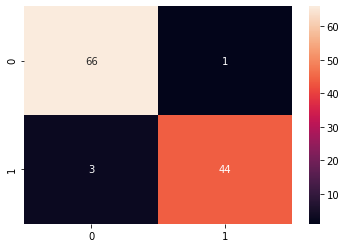

In [22]:
sns.heatmap(cm,annot=True)
plt.savefig('h.png')

In [23]:
# First Accuracy after training

(66+44) / 114

0.9649122807017544

# Now Applying K-fold cross Validation 

In [24]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense

def built_classifier():
    # aager code gula abr liktesi
    classifier = Sequential()
    classifier.add(Dense(output_dim=16, init='uniform', activation='relu', input_dim=30))
    classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
    classifier.add(Dense(output_dim=1, init='uniform', activation='sigmoid')) 
    classifier.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = built_classifier, batch_size = 100, epochs = 100 )
accuracies = cross_val_score(estimator= classifier, X = training_x, y = training_y, cv = 10, n_jobs = -1)  #n_jobs = -1--> large data set er jonno use kora hoy 

In [25]:
accuracies

array([1.        , 1.        , 1.        , 0.97826087, 0.95652175,
       0.95555556, 0.97777778, 1.        , 1.        , 0.95555556])

In [26]:
mean = accuracies.mean()
mean   # 10-fold er jonno accuracy

0.9823671519756317

In [27]:
standard_deviation = accuracies.std()
standard_deviation

0.01923075259494915